In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import math
import seaborn as sbn
# Scikit Learn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
import warnings
warnings.simplefilter("ignore")

In [ ]:
!wget https://raw.githubusercontent.com/Natalia-rodgom/final/main/1.2.5.IPC_Serie_variaciones.csv

--2022-05-17 23:12:10--  https://raw.githubusercontent.com/Natalia-rodgom/final/main/1.2.5.IPC_Serie_variaciones.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1644 (1.6K) [text/plain]
Saving to: ‘1.2.5.IPC_Serie_variaciones.csv.2’

1.2.5.IPC_Serie_var 100%[===================>]   1.61K  --.-KB/s    in 0s      

2022-05-17 23:12:11 (34.0 MB/s) - ‘1.2.5.IPC_Serie_variaciones.csv.2’ saved [1644/1644]



In [ ]:
Y = pd.read_csv("https://raw.githubusercontent.com/Natalia-rodgom/final/main/1.2.5.IPC_Serie_variaciones.csv",sep=";")
Y = pd.DataFrame(Y).dropna()
Y

,indice
0,0.5645
1,0.5702
2,0.5746
3,0.5772
4,0.5795
...,...
203,11.1410
204,11.3260
205,11.5110
206,11.6260


In [ ]:
Y.describe()

,indice
count,208.000000
mean,2.489749
std,3.755510
min,0.564500
25%,0.711800
50%,0.794650
75%,0.970725
max,11.771000


In [ ]:
mu=Y.mean()
mu

indice    2.489749
dtype: float64

In [ ]:
sigma=Y.std()
sigma

indice    3.75551
dtype: float64

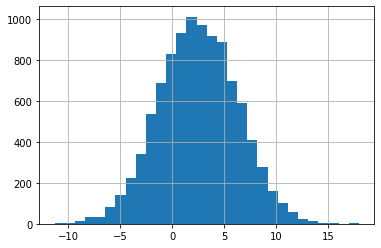

In [ ]:
rand_data = np.random.normal(2.489749,3.75551,10000)
pd.Series(rand_data).hist(bins=30)

Se puede observar una grafica en forma de campana dada por mu correspondiete al mean de los datos ontenidos y a sigma, esto con un valor de 10.000 y definidos en unos bloques de 30; con lo que se puede determinar que al analizar la distancia de los datos en relación a la media obtenida, significa que existe una distribucion en forma de campana en la que dicha distancia entre los datos es mayor.

In [ ]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    St = S # {"S":S} 
    return St

In [ ]:
T = 1
mu = 2.489749
sigma = 3.75551
S0 = 100
NS = 10000
M = 252
St = PathsGBM(S0,mu,sigma,T,NS,M)

Text(0, 0.5, 'S(t)')

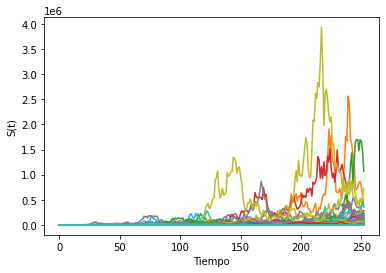

In [ ]:
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")
plt.ylabel("S(t)")

En esta grafica de tiempo se esta apliccando el movimiento Brawniano geometrico, en el cual al tener en cuenta valores obtenidos anteriormete tal como es el caso de  mu y sigma; se observa el comportamiento de la tasa en un tramo de tiempo superior a 250 en el cual se observa por su tendencia que, tenderá a ser elevado en el siguiente periodo de tiempo. 
